<font size = "6"> Analysing Pit Stops in F1 - season 2022 </font> 

In [27]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

<font size = "5"> Data loading & Data Info </font> 

In [2]:
#!ls

In [3]:
data = pd.read_csv("F12022PitStops.csv")
pitstops = data.copy()

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   RacePos      735 non-null    int64  
 1   Team         735 non-null    object 
 2   Driver       735 non-null    object 
 3   Time         735 non-null    float64
 4   Lap          735 non-null    int64  
 5   Points       220 non-null    float64
 6   Race         735 non-null    object 
 7   Round        735 non-null    int64  
 8   Orientation  735 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 51.8+ KB


In [5]:
data.describe()

,RacePos,Time,Lap,Points,Round
count,735.000000,735.000000,735.000000,220.000000,735.000000
mean,19.156463,3.887837,27.268027,10.100000,11.463946
std,12.909505,2.700981,14.403309,7.219899,6.318822
min,1.000000,1.980000,1.000000,1.000000,1.000000
25%,9.000000,2.640000,16.000000,4.000000,6.000000
50%,17.000000,3.150000,24.000000,9.000000,12.000000
75%,27.000000,3.810000,39.000000,15.000000,16.000000
max,58.000000,31.940000,69.000000,25.000000,22.000000


In [6]:
data.head()

,RacePos,Team,Driver,Time,Lap,Points,Race,Round,Orientation
0,1,McLaren,Ricciardo,2.31,17,25.0,Bahrain,1,Right
1,2,Ferrari,Sainz,2.33,14,18.0,Bahrain,1,Right
2,3,Ferrari,Sainz,2.40,33,NaN,Bahrain,1,Right
3,4,Alpine,Ocon,2.46,43,15.0,Bahrain,1,Right
4,5,Williams,Latifi,2.47,14,12.0,Bahrain,1,Right


<font size = "5"> Pit stops per race </font> 

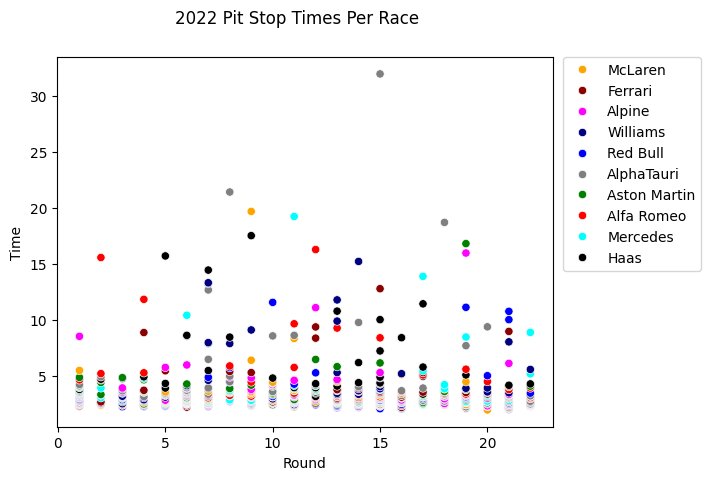

In [7]:
team_colors = {'Ferrari':'darkred', 'McLaren':'orange', 'Williams':'navy', 'Mercedes':'cyan', 'Haas':'black', 'Aston Martin':'green', 'Alfa Romeo':'red', 'Red Bull':'blue', 'AlphaTauri':'gray', 'Alpine':'fuchsia'}
plt.suptitle('2022 Pit Stop Times Per Race')
sns.scatterplot(x=pitstops['Round'], y=pitstops['Time'], hue=pitstops['Team'], data=pitstops, palette=team_colors)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

<font size = "5"> Pit stops per team </font> 

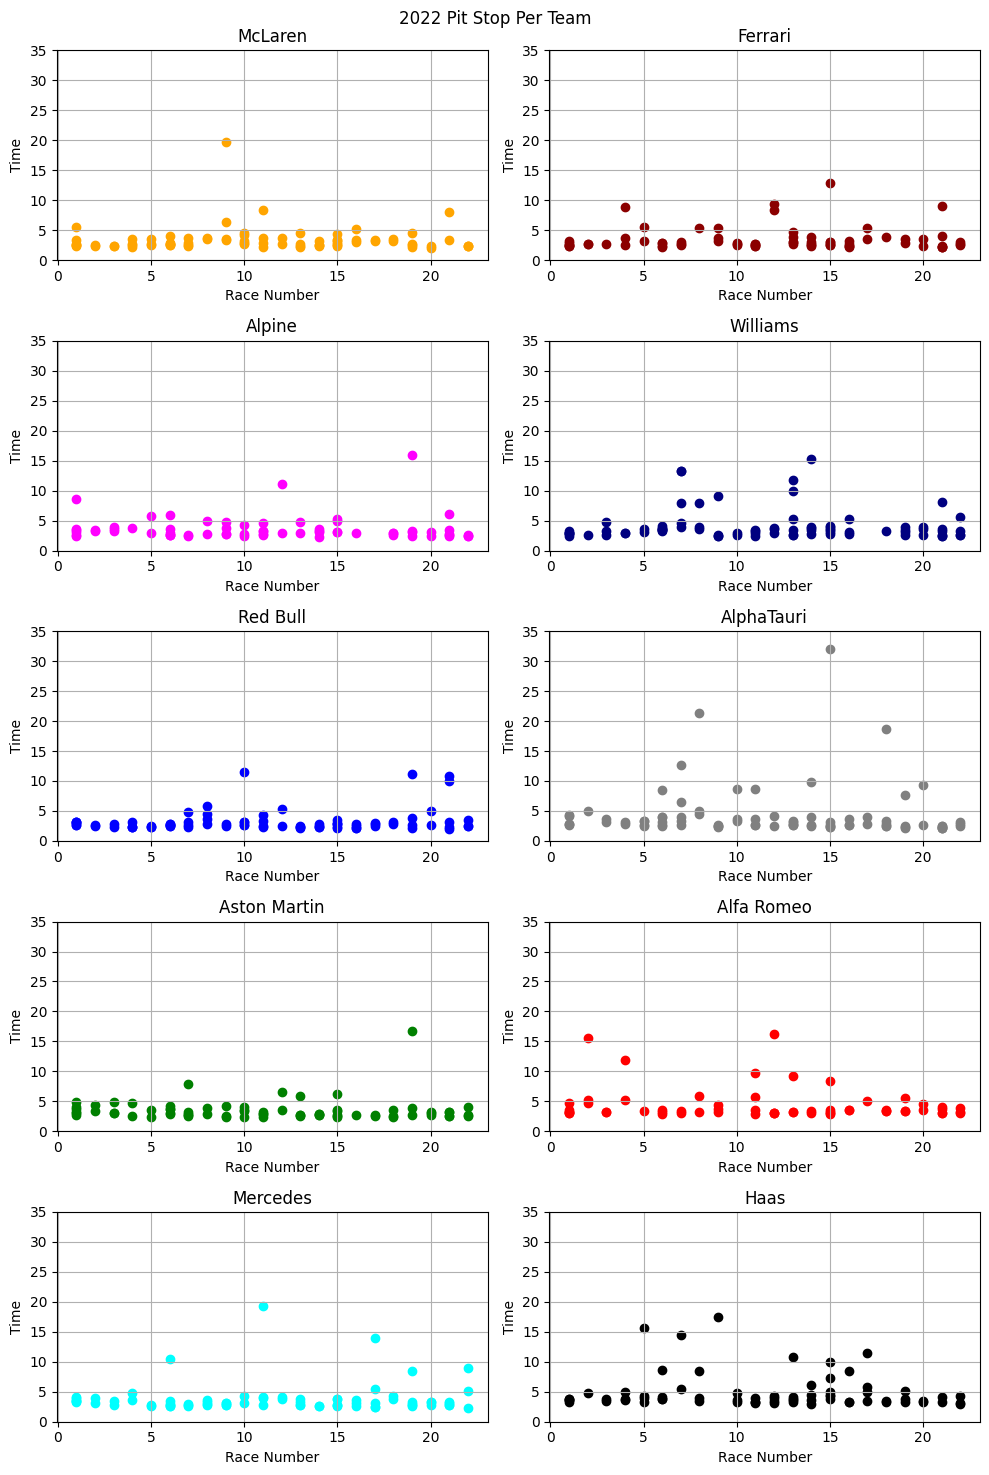

In [20]:
plt.figure(figsize = (10,15))
team_list = pitstops['Team'].unique()
x = 1
plt.suptitle("2022 Pit Stop Per Team")
for Team in team_list:
    team_stops = pitstops[pitstops['Team'] == Team]
    plt.subplot(5,2,x)
    plt.scatter(x=team_stops['Round'], y=team_stops['Time'], c=team_colors[Team])
    plt.title(Team)
    plt.ylim(0,35)
    plt.tight_layout()
    plt.xlabel('Race Number')
    plt.ylabel('Time')
    plt.grid()
    x+=1


In [25]:
max_index = pitstops['Time'].idxmax()
max_row = pitstops.loc[max_index]
print(max_row)

RacePos                57
Team           AlphaTauri
Driver            Tsunoda
Time                31.94
Lap                    43
Points                NaN
Race            Zandvoort
Round                  15
Orientation         Right
Name: 527, dtype: object


In [35]:
max_index = pitstops['Time'].idxmin()
max_row = pitstops.loc[max_index]
print(max_row)

RacePos                1
Team             McLaren
Driver         Ricciardo
Time                1.98
Lap                   44
Points              25.0
Race              Mexico
Round                 20
Orientation        Right
Name: 637, dtype: object


<font size = "5"> Number of pitstops per team </font>

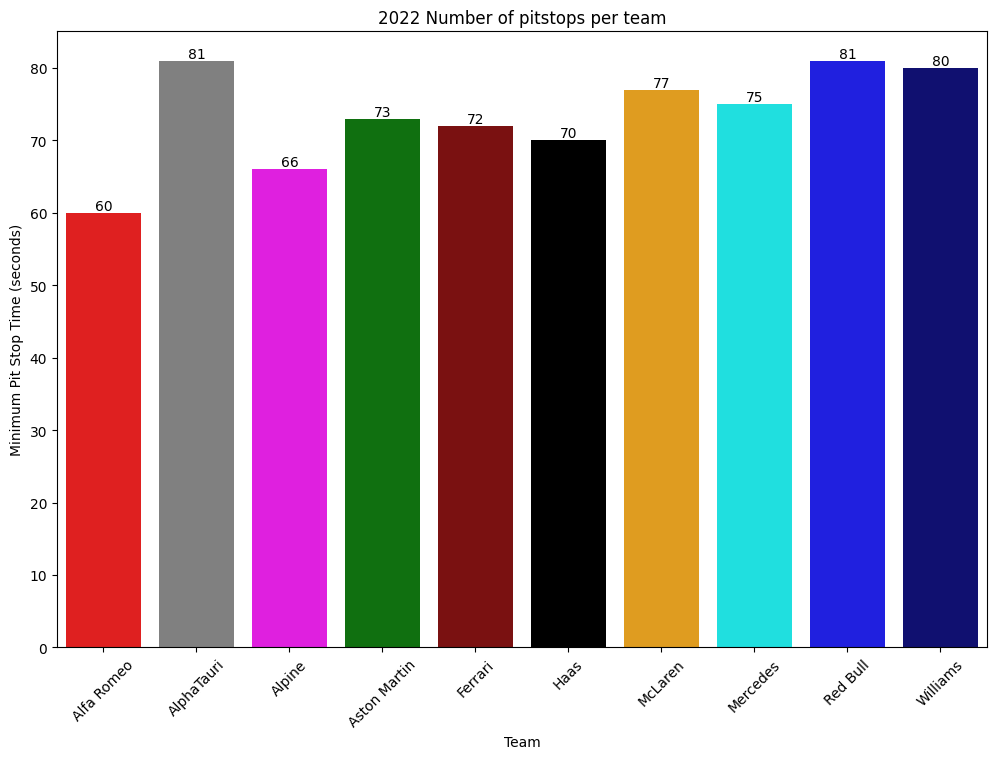

In [41]:
#plt.figure(fig_size = (8,8))
#TODO
num_of_pitstops = pitstops.groupby('Team').count().reset_index()

# Plot the results
plt.figure(figsize=(12, 8))
plt.title("2022 Number of pitstops per team")
ax = sns.barplot(x='Team', y = 'Round', data=num_of_pitstops, palette=team_colors, errorbar=None)

# Annotate the bars with the minimum values
for container in ax.containers:
    ax.bar_label(container)

plt.xlabel('Team')
plt.ylabel('Minimum Pit Stop Time (seconds)')
plt.xticks(rotation=45)
plt.show()

<font size = "5"> Distribution of pit stops</font>

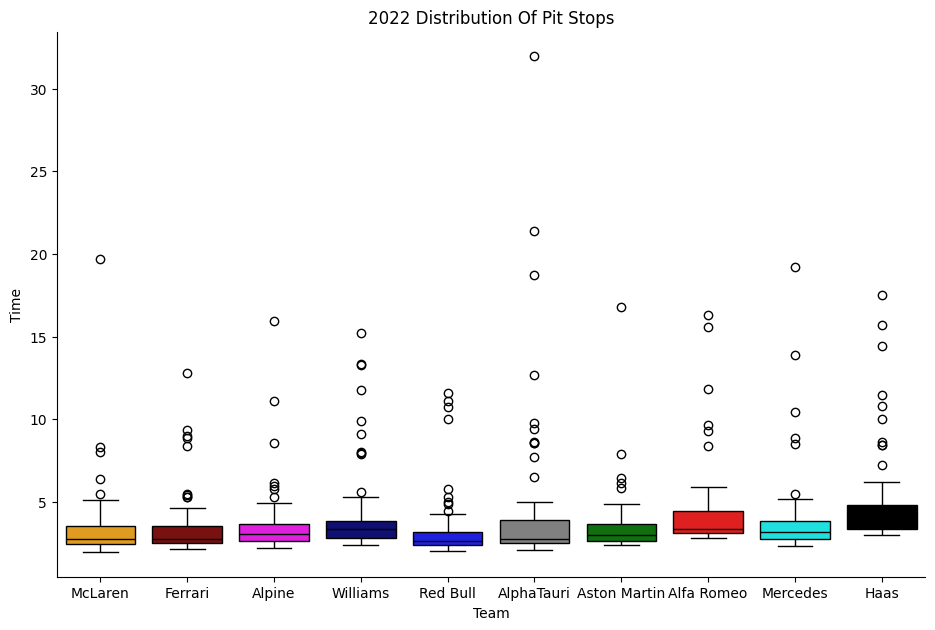

In [10]:
g = sns.FacetGrid(pitstops, sharex=False)
plt.title("2022 Distribution Of Pit Stops")
g.map(sns.boxplot, "Team", "Time", order=team_list, hue=pitstops['Team'], palette=team_colors)
g.fig.set_size_inches(12,8)

<font size = "5"> Average stop time by team </font>

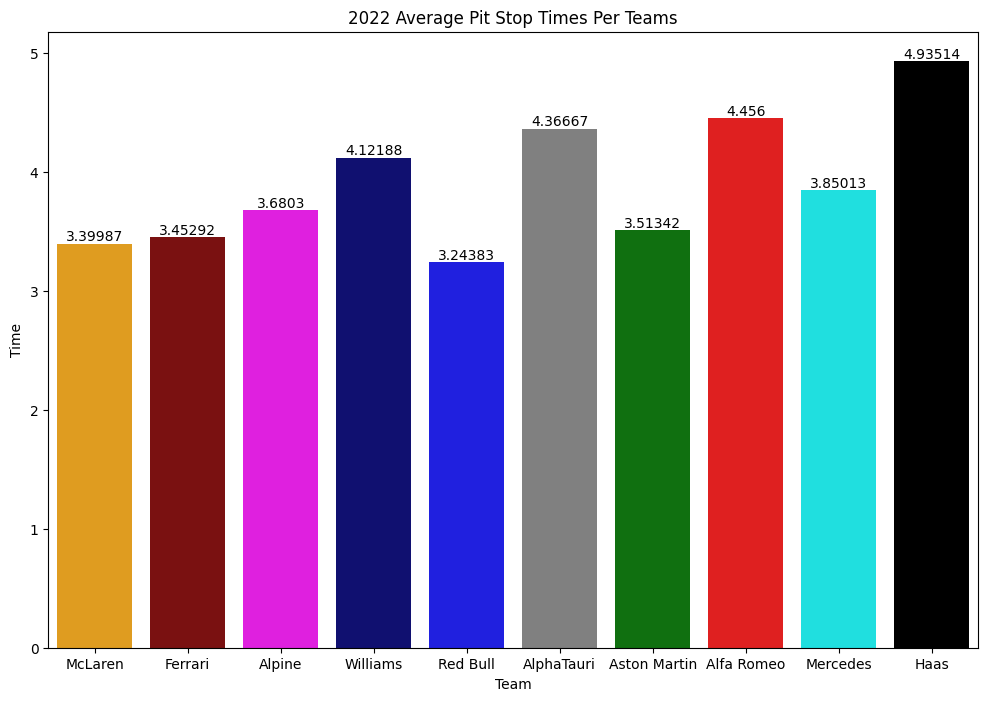

In [11]:
plt.figure(figsize=(12,8))
plt.title("2022 Average Pit Stop Times Per Teams")
ax = sns.barplot(x = "Team", y = "Time", data=pitstops, hue=pitstops['Team'], errorbar=('ci',False), palette=team_colors)
i=0
for i in range (0,10): 
    ax.bar_label(ax.containers[i])


<font size = "5"> Fastest Pit Stop By Team </font>

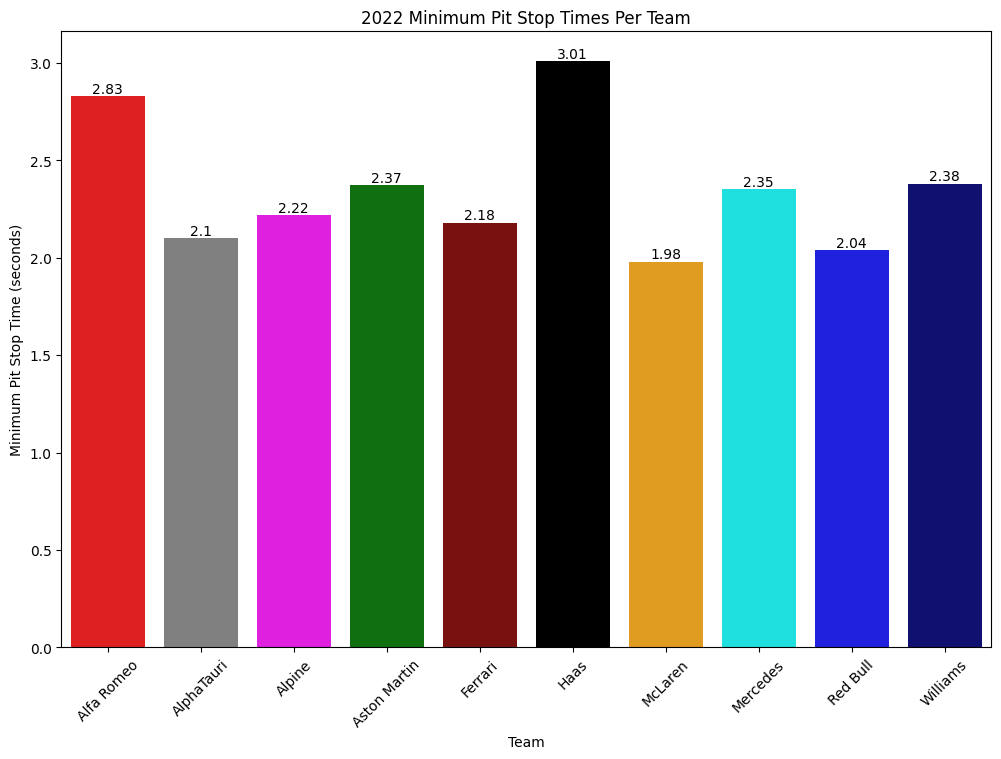

In [28]:
min_pitstop_times = pitstops.groupby('Team')['Time'].min().reset_index()

# Plot the results
plt.figure(figsize=(12, 8))
plt.title("2022 Minimum Pit Stop Times Per Team")
ax = sns.barplot(x='Team', y='Time', data=min_pitstop_times, palette=team_colors, errorbar=None)

# Annotate the bars with the minimum values
for container in ax.containers:
    ax.bar_label(container)

plt.xlabel('Team')
plt.ylabel('Minimum Pit Stop Time (seconds)')
plt.xticks(rotation=45)
plt.show()

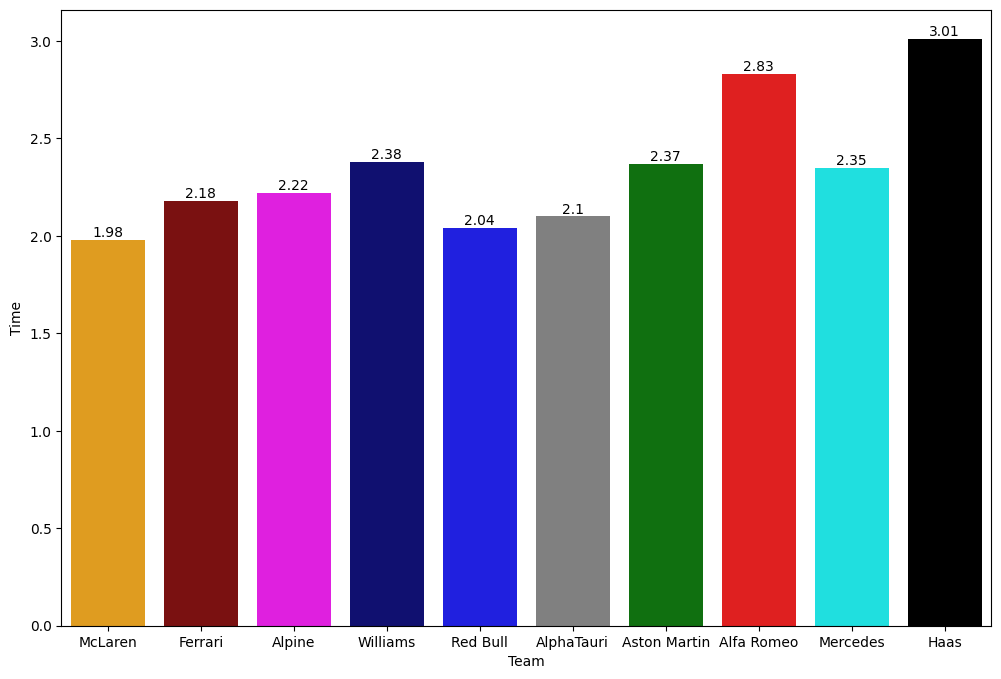

In [32]:
plt.figure(figsize=(12,8))
y = []
for Team in team_list:
     y.append(min(pitstops[pitstops['Team'] == Team]['Time']))

#ax = sns.barplot(x = 'Team', y = y, data = pitstops, errorbar=('ci',False), palette = team_colors)
#plt.bar(team_list, y, color = team_colors)
ax = sns.barplot(x = 'Team', y = 'Time', data=pitstops, errorbar=('ci', False), hue = pitstops['Team'], palette=team_colors, estimator=np.min)
for i in range (0,10): 
    ax.bar_label(ax.containers[i])
    #ax.set_xticks(rotation=45)


In [29]:
x = min(pitstops[pitstops['Team'] == "Red Bull"]['Time'])
x
#min(x['Time'])

2.04

<font size = "5"> Average pit stop times per driver </font>

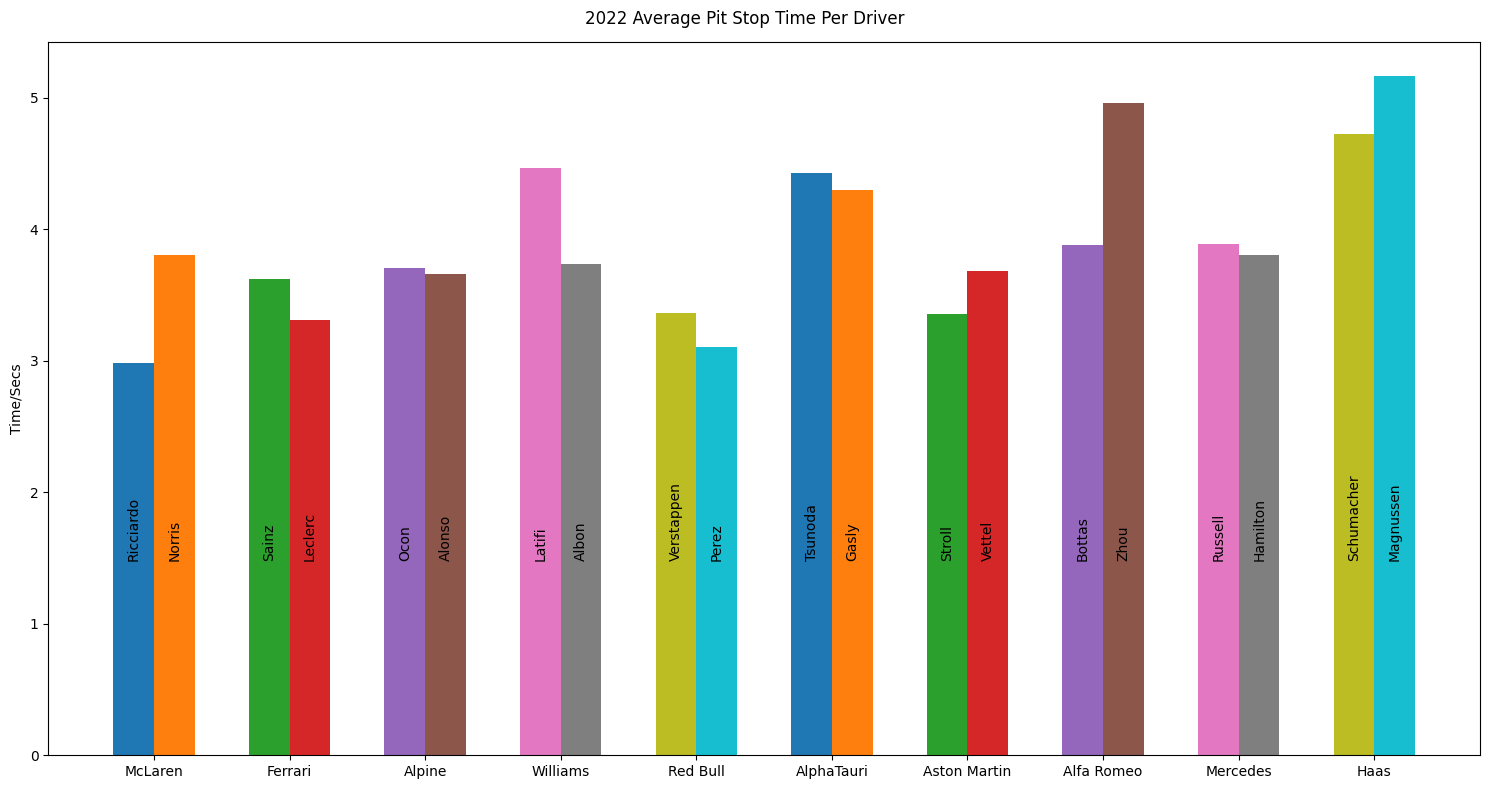

In [15]:
plt.figure(figsize=(15,8))
z = 1
plt.suptitle("2022 Average Pit Stop Time Per Driver")
plt.xticks([1,2,3,4,5,6,7,8,9,10], team_list)
for Team in team_list:
    team_stops = pitstops[pitstops.Team == Team]
    driver_list = team_stops.Driver.unique()
    w = 1
    for Driver in driver_list:
        driver_stops=team_stops[team_stops.Driver == Driver]
        if len(driver_stops) > 10:
            if w == 1:
                br1 = plt.bar(z-0.3/2, driver_stops.Time.mean(), 0.3)
                plt.text(z-0.4/2, 1.5, Driver, rotation=90)
                w += 1
            elif w == 2:
                br2 = plt.bar(z+0.3/2, driver_stops.Time.mean(), 0.3)
                plt.text(z+0.2/2, 1.5, Driver, rotation=90)
                w -= 1
    plt.tight_layout()
    plt.ylabel('Time/Secs')
    plt.grid()
    z += 1
            

<font size = "5"> Average pit stop times by pitlane orientation </font>

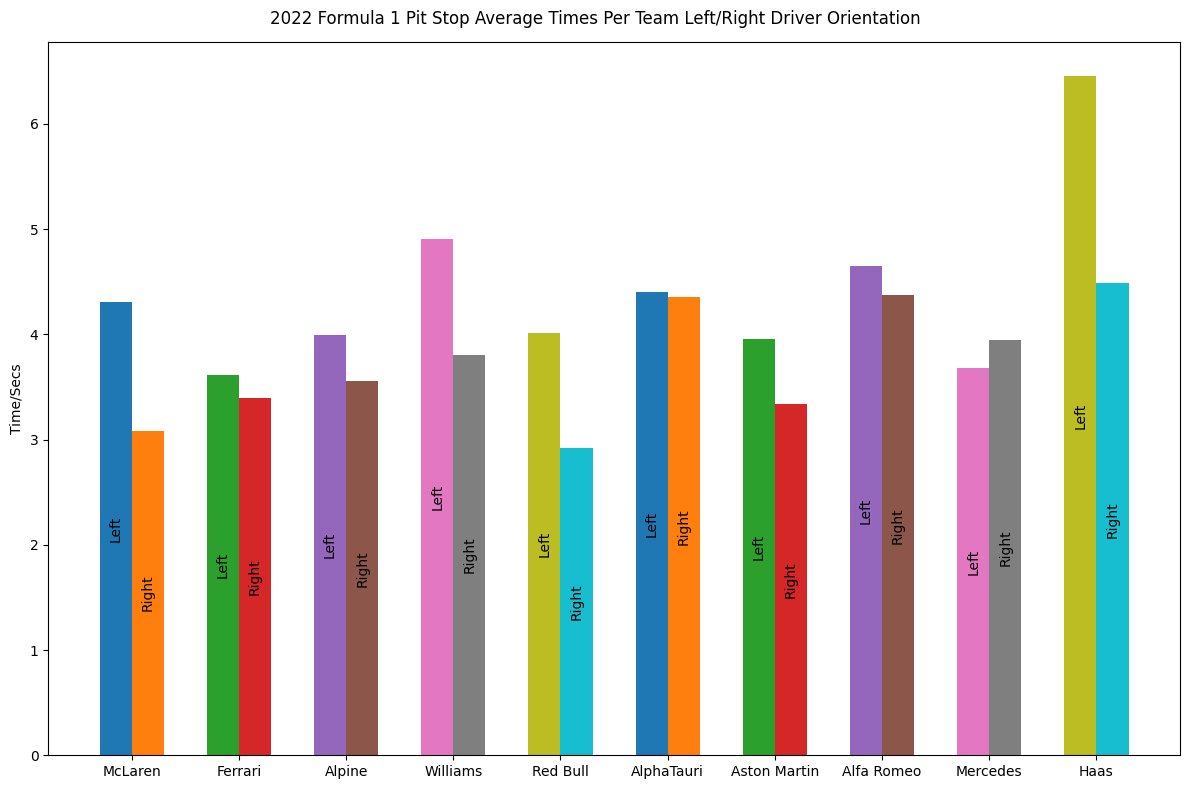

In [16]:
plt.figure(figsize = (12,8))
z = 1
plt.suptitle('2022 Formula 1 Pit Stop Average Times Per Team Left/Right Driver Orientation')
plt.xticks([1,2,3,4,5,6,7,8,9,10], team_list)
for Team in team_list:
    team_stops = pitstops[pitstops.Team == Team]
    team_right_stops = team_stops[team_stops.Orientation == "Right"]
    team_left_stops = team_stops[team_stops.Orientation == "Left"]
    br1 = plt.bar(z-0.3/2, team_left_stops.Time.mean(), 0.3)
    br2 = plt.bar(z+0.3/2, team_right_stops.Time.mean(), 0.3)
    plt.bar_label(br1, labels = ['Left'], label_type='center', rotation=90)
    plt.bar_label(br2, labels = ['Right'], label_type='center', rotation=90)
    plt.tight_layout()
    plt.ylabel('Time/Secs')
    plt.grid()
    z += 1

In [17]:
pitstops.head()

,RacePos,Team,Driver,Time,Lap,Points,Race,Round,Orientation
0,1,McLaren,Ricciardo,2.31,17,25.0,Bahrain,1,Right
1,2,Ferrari,Sainz,2.33,14,18.0,Bahrain,1,Right
2,3,Ferrari,Sainz,2.40,33,NaN,Bahrain,1,Right
3,4,Alpine,Ocon,2.46,43,15.0,Bahrain,1,Right
4,5,Williams,Latifi,2.47,14,12.0,Bahrain,1,Right


<font size = "5"> Best pit stop times per driver </font>

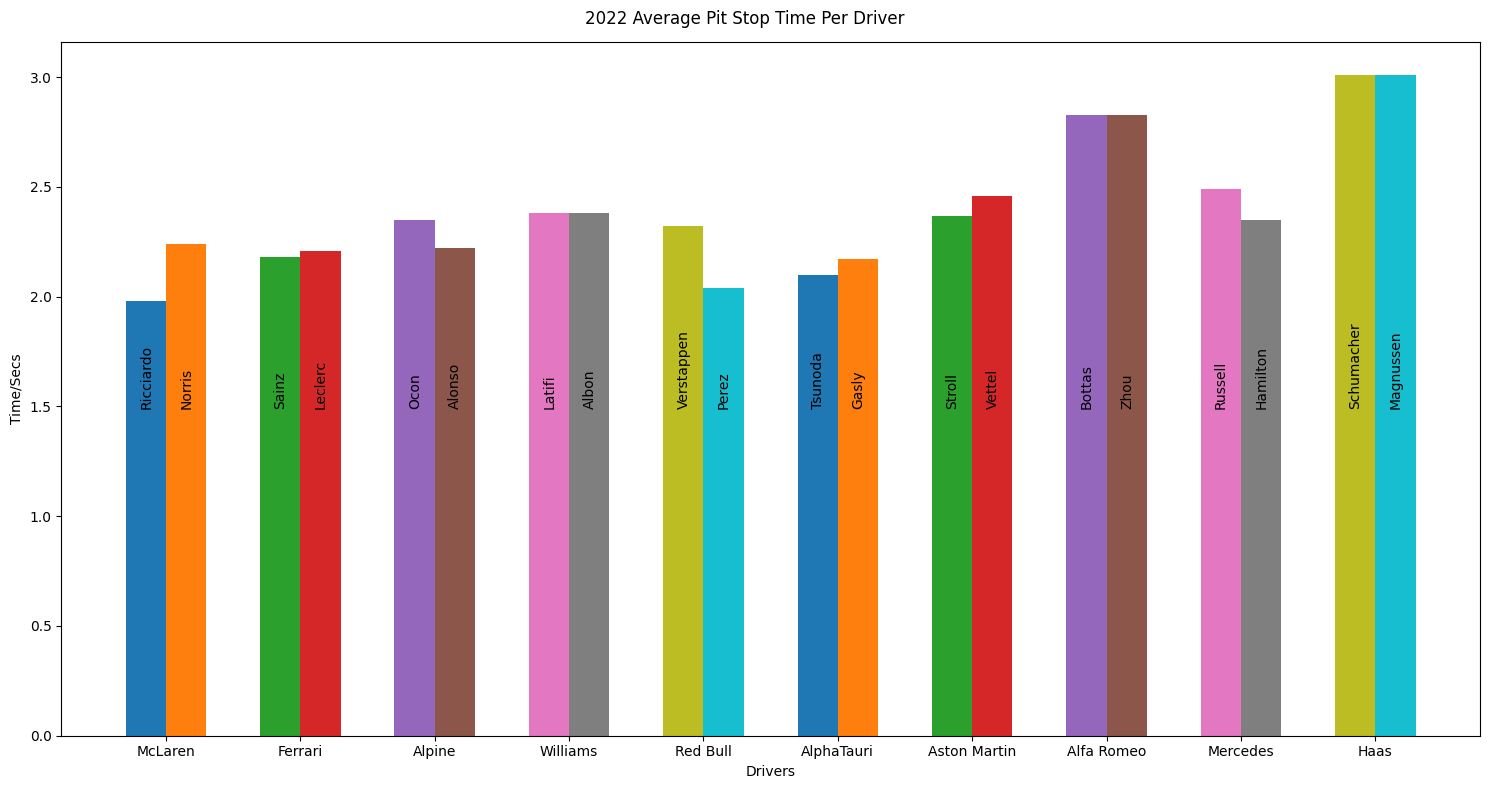

In [42]:
plt.figure(figsize=(15,8))
z = 1
plt.suptitle("2022 Average Pit Stop Time Per Driver")
plt.xticks([1,2,3,4,5,6,7,8,9,10], team_list)
for Team in team_list:
    team_stops = pitstops[pitstops.Team == Team]
    driver_list = team_stops.Driver.unique()
    w = 1
    for Driver in driver_list:
        driver_stops=team_stops[team_stops.Driver == Driver]
        if len(driver_stops) > 10:
            if w == 1:
                br1 = plt.bar(z-0.3/2, driver_stops.Time.min(), 0.3)
                plt.text(z-0.4/2, 1.5, Driver, rotation=90)
                w += 1
            elif w == 2:
                br2 = plt.bar(z+0.3/2, driver_stops.Time.min(), 0.3)
                plt.text(z+0.2/2, 1.5, Driver, rotation=90)
                w -= 1
    plt.tight_layout()
    plt.ylabel('Time/Secs')
    plt.xlabel('Drivers')
    plt.grid()
    z += 1

In [43]:
#TODO: Pitstops per race
#TODO: Correlation between winner & his pitstp time
#TODO: If both drivers from same team pitted in same lap, did it effect their pitstops?
#TODO: Max number of pitstops per race
#TODO: For each race graph : (lap, num of pit stops)
#TODO: For each race graph: 25p pits vs 18p pits
#TODO: sort drivers by points in season
#TODO: sort constructor by points in season